# Estudo de Caso – Modelo de Admissão de Crédito

# **Parte 1 - Problema de Negócio**

**Projeto de Data Science**

**Contexto do Negócio**

A empresa busca aprimorar seu processo de admissão de clientes com o objetivo de reduzir o risco de inadimplência e aumentar a qualidade da carteira de crédito.

Atualmente, decisões de concessão podem resultar em:

* Perdas financeiras associadas a atrasos superiores a 30 dias
* Aumento do risco global da carteira
* Ineficiência no processo de aprovação de crédito

Diante desse cenário, torna-se necessário o desenvolvimento de uma solução analítica que permita estimar o risco de inadimplência no momento da entrada do cliente, antes da concessão do crédito.

**Problema de Negócio**

Como apoiar o processo de decisão de concessão de crédito por meio de um modelo analítico capaz de prever a probabilidade de inadimplência de novos clientes, reduzindo perdas financeiras e melhorando a qualidade da carteira?

**Objetivo do Projeto**

Desenvolver um modelo de admissão de crédito capaz de prever a probabilidade de inadimplência dos clientes, representada pela variável resposta **Over30Mob3**.

O modelo será construído a partir de variáveis cadastrais e financeiras disponíveis no momento da admissão do cliente.

**Definição da Variável Alvo**

**Over30Mob3**

* 1 = Cliente que atrasou mais de 30 dias dentro dos primeiros 3 meses
* 0 = Cliente adimplente

Trata-se de um problema de classificação binária.

**Objetivo Analítico (Data Science)**

Construir um modelo de classificação que permita:

* Estimar a probabilidade de inadimplência de um novo cliente
* Identificar os principais fatores associados ao risco de crédito
* Apoiar decisões de aprovação ou reprovação de crédito

**Perguntas de Negócio**

O modelo deve responder às seguintes questões:

* Qual é a probabilidade de um novo cliente se tornar inadimplente (Over30Mob3 = 1)?
* Quais características dos clientes estão mais associadas ao risco de inadimplência?
* É possível segmentar clientes em grupos de baixo e alto risco?
* Como apoiar a decisão de aprovação ou reprovação de crédito de forma objetiva?

**Métrica de Sucesso**

O sucesso da solução será medido pela sua capacidade de:

* Identificar corretamente clientes com alto risco de inadimplência
* Reduzir falsos negativos (clientes inadimplentes aprovados)
* Manter uma taxa adequada de aprovação de bons clientes

Indicadores utilizados:

* Acurácia
* Recall da classe inadimplente
* AUC-ROC

**Entregável Final**

Será entregue uma apresentação em Excel contendo:

* Análise exploratória dos dados
* Tratamento e preparação das variáveis
* Construção de um modelo simples e interpretável
* Avaliação dos resultados
* Interpretação das variáveis mais relevantes
* Conclusões e próximos passos

**Abordagem do Projeto**

O projeto será conduzido seguindo as seguintes etapas:

1. Compreensão do problema de negócio
2. Análise exploratória dos dados
3. Preparação e tratamento das variáveis
4. Construção do modelo preditivo
5. Avaliação dos resultados
6. Interpretação e conclusões

# Parte 2 - Database

In [ ]:
# Sistema/IO
import os                 
import joblib        
from tqdm import tqdm    
from tqdm_joblib import tqdm_joblib 

# Manipulação/EDA
import pandas as pd       
import numpy as np        
import seaborn as sns     
import matplotlib.pyplot as plt  # Gráficos base
from scipy import stats   

# Pré-processamento e split
from sklearn.model_selection import train_test_split  
from imblearn.over_sampling import SMOTE              
from sklearn.preprocessing import LabelEncoder        

# Modelos (classificação)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Validação e busca de hiperparâmetros
from sklearn.model_selection import GridSearchCV, StratifiedKFold  
from sklearn.model_selection import cross_val_score     
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  
from imblearn.pipeline import Pipeline  

# Métricas e avaliação
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_curve, auc              
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix  

c:\Users\rafae.RAFAEL_NOTEBOOK\anaconda3\Lib\site-packages\tqdm_joblib\__init__.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
# Caminho do arquivo 
file_path = r"C:\Users\rafae.RAFAEL_NOTEBOOK\Downloads\Case_tecnico_Koin\input\Cargos_salarios_CPNU2_ (1).xlsx"

# Lê a planilha "Base_Dados" do Excel e carrega em um DataFrame 
df = pd.read_excel(file_path, sheet_name="Base_Dados")  # sheet_name pode ser nome ou índice 

# Exibe o DataFrame 
df

,safra,id_trx,Data compra,Hora da compra,Tipo de cliente,valor_compra,Tempo até utilização,over30_mob3,risco_validador,provedor_email,idade_cliente,Produto_1,Produto_2,Produto_3,uf,Renda,Score Email,Score Pessoa
0,202212,1,2022-12-30,17,1,1085.87,121 - 150 dias,0,Baixo Risco,hotmail,33.0,1,0,0,SP,1600.0,NaN,309.0
1,202303,2,2023-03-03,15,1,1686.34,16 - 30 dias,0,Baixo Risco,hotmail,34.0,1,0,0,SP,4250.0,85.0,322.0
2,202302,3,2023-02-02,19,1,2807.66,241 - 270 dias,0,Baixo Risco,terra,28.0,1,0,0,SP,1700.0,82.0,514.0
3,202303,5,2023-03-27,16,1,333.92,16 - 30 dias,1,Baixo Risco,gmail,53.0,1,0,0,PR,2950.0,50.0,441.0
4,202303,7,2023-03-06,23,1,2721.98,61 - 90 dias,0,Baixo Risco,hotmail,34.0,1,1,1,BA,3650.0,190.0,474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32837,202303,32766,2023-03-24,13,2,6431.54,181 - 210 dias,0,Medio Risco,gmail,28.0,1,1,0,AC,4250.0,5.0,341.0
32838,202211,32780,2022-11-19,10,2,1702.78,46 - 60 dias,1,Baixo Risco,yahoo,33.0,1,0,0,SP,1500.0,137.0,290.0
32839,202212,32793,2022-12-10,1,2,6515.57,91 - 120 dias,0,Baixo Risco,hotmail,39.0,1,1,0,MG,7150.0,90.0,527.0
32840,202301,32804,2023-01-29,21,2,1320.00,16 - 30 dias,0,Baixo Risco,gmail,34.0,1,0,0,SP,3700.0,79.0,483.0


In [3]:
df.head()

,safra,id_trx,Data compra,Hora da compra,Tipo de cliente,valor_compra,Tempo até utilização,over30_mob3,risco_validador,provedor_email,idade_cliente,Produto_1,Produto_2,Produto_3,uf,Renda,Score Email,Score Pessoa
0,202212,1,2022-12-30,17,1,1085.87,121 - 150 dias,0,Baixo Risco,hotmail,33.0,1,0,0,SP,1600.0,NaN,309.0
1,202303,2,2023-03-03,15,1,1686.34,16 - 30 dias,0,Baixo Risco,hotmail,34.0,1,0,0,SP,4250.0,85.0,322.0
2,202302,3,2023-02-02,19,1,2807.66,241 - 270 dias,0,Baixo Risco,terra,28.0,1,0,0,SP,1700.0,82.0,514.0
3,202303,5,2023-03-27,16,1,333.92,16 - 30 dias,1,Baixo Risco,gmail,53.0,1,0,0,PR,2950.0,50.0,441.0
4,202303,7,2023-03-06,23,1,2721.98,61 - 90 dias,0,Baixo Risco,hotmail,34.0,1,1,1,BA,3650.0,190.0,474.0


In [4]:
df.tail()

,safra,id_trx,Data compra,Hora da compra,Tipo de cliente,valor_compra,Tempo até utilização,over30_mob3,risco_validador,provedor_email,idade_cliente,Produto_1,Produto_2,Produto_3,uf,Renda,Score Email,Score Pessoa
32837,202303,32766,2023-03-24,13,2,6431.54,181 - 210 dias,0,Medio Risco,gmail,28.0,1,1,0,AC,4250.0,5.0,341.0
32838,202211,32780,2022-11-19,10,2,1702.78,46 - 60 dias,1,Baixo Risco,yahoo,33.0,1,0,0,SP,1500.0,137.0,290.0
32839,202212,32793,2022-12-10,1,2,6515.57,91 - 120 dias,0,Baixo Risco,hotmail,39.0,1,1,0,MG,7150.0,90.0,527.0
32840,202301,32804,2023-01-29,21,2,1320.00,16 - 30 dias,0,Baixo Risco,gmail,34.0,1,0,0,SP,3700.0,79.0,483.0
32841,202302,32826,2023-02-02,7,2,1741.96,121 - 150 dias,0,Medio Risco,hotmail,36.0,1,0,0,DF,4350.0,50.0,434.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32842 entries, 0 to 32841
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   safra                 32842 non-null  int64         
 1   id_trx                32842 non-null  int64         
 2   Data compra           32842 non-null  datetime64[ns]
 3   Hora da compra        32842 non-null  int64         
 4   Tipo de cliente       32842 non-null  int64         
 5   valor_compra          32842 non-null  float64       
 6   Tempo até utilização  32842 non-null  object        
 7   over30_mob3           32842 non-null  int64         
 8   risco_validador       32842 non-null  object        
 9   provedor_email        32665 non-null  object        
 10  idade_cliente         32797 non-null  float64       
 11  Produto_1             32842 non-null  int64         
 12  Produto_2             32842 non-null  int64         
 13  Produto_3       

In [6]:
df.shape

(32842, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32842 entries, 0 to 32841
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   safra                 32842 non-null  int64         
 1   id_trx                32842 non-null  int64         
 2   Data compra           32842 non-null  datetime64[ns]
 3   Hora da compra        32842 non-null  int64         
 4   Tipo de cliente       32842 non-null  int64         
 5   valor_compra          32842 non-null  float64       
 6   Tempo até utilização  32842 non-null  object        
 7   over30_mob3           32842 non-null  int64         
 8   risco_validador       32842 non-null  object        
 9   provedor_email        32665 non-null  object        
 10  idade_cliente         32797 non-null  float64       
 11  Produto_1             32842 non-null  int64         
 12  Produto_2             32842 non-null  int64         
 13  Produto_3       

In [8]:
df.dtypes

safra                            int64
id_trx                           int64
Data compra             datetime64[ns]
Hora da compra                   int64
Tipo de cliente                  int64
valor_compra                   float64
Tempo até utilização            object
over30_mob3                      int64
risco_validador                 object
provedor_email                  object
idade_cliente                  float64
Produto_1                        int64
Produto_2                        int64
Produto_3                        int64
uf                              object
Renda                          float64
Score Email                    float64
Score Pessoa                   float64
dtype: object

# Parte 3 - Pre-processamento

In [9]:
# Padronização dos nomes das colunas (minúsculas, sem espaços e sem acentos)
df.columns = (
    df.columns.str.lower()
    .str.replace(" ", "_")
    .str.normalize("NFKD")
    .str.encode("ascii", errors="ignore")
    .str.decode("utf-8")
)

# Remoção de registros duplicados com base no id da transação
df = df.drop_duplicates(subset="id_trx")

# Conversão da coluna de data para formato datetime
df["data_compra"] = pd.to_datetime(df["data_compra"], errors="coerce")

# Conversão da hora da compra para valor numérico (hora)
df["hora_da_compra"] = pd.to_datetime(df["hora_da_compra"], errors="coerce").dt.hour

# Lista de colunas numéricas
num_cols = [
    "valor_compra",
    "tempo_ate_utilizacao",
    "idade_cliente",
    "renda",
    "score_email",
    "score_pessoa"
]

# Conversão das colunas numéricas para tipo numérico
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Conversão da variável alvo para inteiro
df["over30_mob3"] = df["over30_mob3"].astype("Int64")

# Tratamento de valores ausentes nas colunas numéricas usando a mediana
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Lista de colunas categóricas
cat_cols = [
    "tipo_de_cliente",
    "risco_validador",
    "provedor_email",
    "produto_1",
    "produto_2",
    "produto_3",
    "uf"
]

# Tratamento de valores ausentes nas colunas categóricas
for col in cat_cols:
    df[col] = df[col].fillna("Desconhecido")

# Garantir que a variável alvo contenha apenas valores 0 ou 1
df = df[df["over30_mob3"].isin([0, 1])]

# Criação da variável dia da semana a partir da data da compra
df["dia_semana"] = df["data_compra"].dt.day_name()

# Visualização inicial do dataset tratado
df.head()

,safra,id_trx,data_compra,hora_da_compra,tipo_de_cliente,valor_compra,tempo_ate_utilizacao,over30_mob3,risco_validador,provedor_email,idade_cliente,produto_1,produto_2,produto_3,uf,renda,score_email,score_pessoa,dia_semana
0,202212,1,2022-12-30,0,1,1085.87,NaN,0,Baixo Risco,hotmail,33.0,1,0,0,SP,1600.0,82.0,309.0,Friday
1,202303,2,2023-03-03,0,1,1686.34,NaN,0,Baixo Risco,hotmail,34.0,1,0,0,SP,4250.0,85.0,322.0,Friday
2,202302,3,2023-02-02,0,1,2807.66,NaN,0,Baixo Risco,terra,28.0,1,0,0,SP,1700.0,82.0,514.0,Thursday
3,202303,5,2023-03-27,0,1,333.92,NaN,1,Baixo Risco,gmail,53.0,1,0,0,PR,2950.0,50.0,441.0,Monday
4,202303,7,2023-03-06,0,1,2721.98,NaN,0,Baixo Risco,hotmail,34.0,1,1,1,BA,3650.0,190.0,474.0,Monday


# **Parte 4 - Limpeza de dados**

In [ ]:
# Remove colunas que não serão usadas (DataFrame.drop com parâmetro columns) 
df = df.drop(columns=["id_trx"])            # Retorna um novo DataFrame sem a coluna informada 
df = df.drop(columns=["risco_validador"])   # Remove outra coluna pelo nome 

# Exibe o DataFrame atualizado
df


,safra,data_compra,hora_da_compra,tipo_de_cliente,valor_compra,tempo_ate_utilizacao,over30_mob3,provedor_email,idade_cliente,produto_1,produto_2,produto_3,uf,renda,score_email,score_pessoa,dia_semana
0,202212,2022-12-30,0,1,1085.87,NaN,0,hotmail,33.0,1,0,0,SP,1600.0,82.0,309.0,Friday
1,202303,2023-03-03,0,1,1686.34,NaN,0,hotmail,34.0,1,0,0,SP,4250.0,85.0,322.0,Friday
2,202302,2023-02-02,0,1,2807.66,NaN,0,terra,28.0,1,0,0,SP,1700.0,82.0,514.0,Thursday
3,202303,2023-03-27,0,1,333.92,NaN,1,gmail,53.0,1,0,0,PR,2950.0,50.0,441.0,Monday
4,202303,2023-03-06,0,1,2721.98,NaN,0,hotmail,34.0,1,1,1,BA,3650.0,190.0,474.0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32837,202303,2023-03-24,0,2,6431.54,NaN,0,gmail,28.0,1,1,0,AC,4250.0,5.0,341.0,Friday
32838,202211,2022-11-19,0,2,1702.78,NaN,1,yahoo,33.0,1,0,0,SP,1500.0,137.0,290.0,Saturday
32839,202212,2022-12-10,0,2,6515.57,NaN,0,hotmail,39.0,1,1,0,MG,7150.0,90.0,527.0,Saturday
32840,202301,2023-01-29,0,2,1320.00,NaN,0,gmail,34.0,1,0,0,SP,3700.0,79.0,483.0,Sunday


In [11]:
# Ver quantidade de valores nulos por coluna
null_counts = df.isnull().sum()

# Criar tabela com quantidade e percentual de nulos
null_table = pd.DataFrame({
    "Qtd_Nulos": null_counts,
    "Percentual_%": (null_counts / len(df)) * 100
}).sort_values(by="Percentual_%", ascending=False)

# Remover a coluna que possui 100% de valores nulos
df = df.drop(columns=["tempo_ate_utilizacao"])

# Lista de colunas numéricas
num_cols = [
    "valor_compra",
    "idade_cliente",
    "renda",
    "score_email",
    "score_pessoa"
]

# Imputação dos valores nulos usando a média
for col in num_cols:
    media = df[col].mean()
    df[col] = df[col].fillna(media)

# Verificar se ainda existem valores nulos
df.isnull().sum()

safra              0
data_compra        0
hora_da_compra     0
tipo_de_cliente    0
valor_compra       0
over30_mob3        0
provedor_email     0
idade_cliente      0
produto_1          0
produto_2          0
produto_3          0
uf                 0
renda              0
score_email        0
score_pessoa       0
dia_semana         0
dtype: int64

In [ ]:
# Seleciona apenas colunas numéricas (int64 e float64) 
num_cols = df.select_dtypes(include=["int64", "float64"]).columns  # Retorna os nomes das colunas filtradas 

# Preenche valores ausentes (NaN) nas colunas numéricas com a média de cada coluna 
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())  # fillna substitui NA/NaN pelo valor informado

# Conta quantos valores nulos ainda existem por coluna (True/False vira 1/0 na soma)
# Retorna uma Series com a contagem de nulos por coluna 
df.isnull().sum()  

safra              0
data_compra        0
hora_da_compra     0
tipo_de_cliente    0
valor_compra       0
over30_mob3        0
provedor_email     0
idade_cliente      0
produto_1          0
produto_2          0
produto_3          0
uf                 0
renda              0
score_email        0
score_pessoa       0
dia_semana         0
dtype: int64

# Parte 6 - Analise de outlers

In [13]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols

Index(['safra', 'tipo_de_cliente', 'valor_compra', 'over30_mob3',
       'idade_cliente', 'produto_1', 'produto_2', 'produto_3', 'renda',
       'score_email', 'score_pessoa'],
      dtype='object')

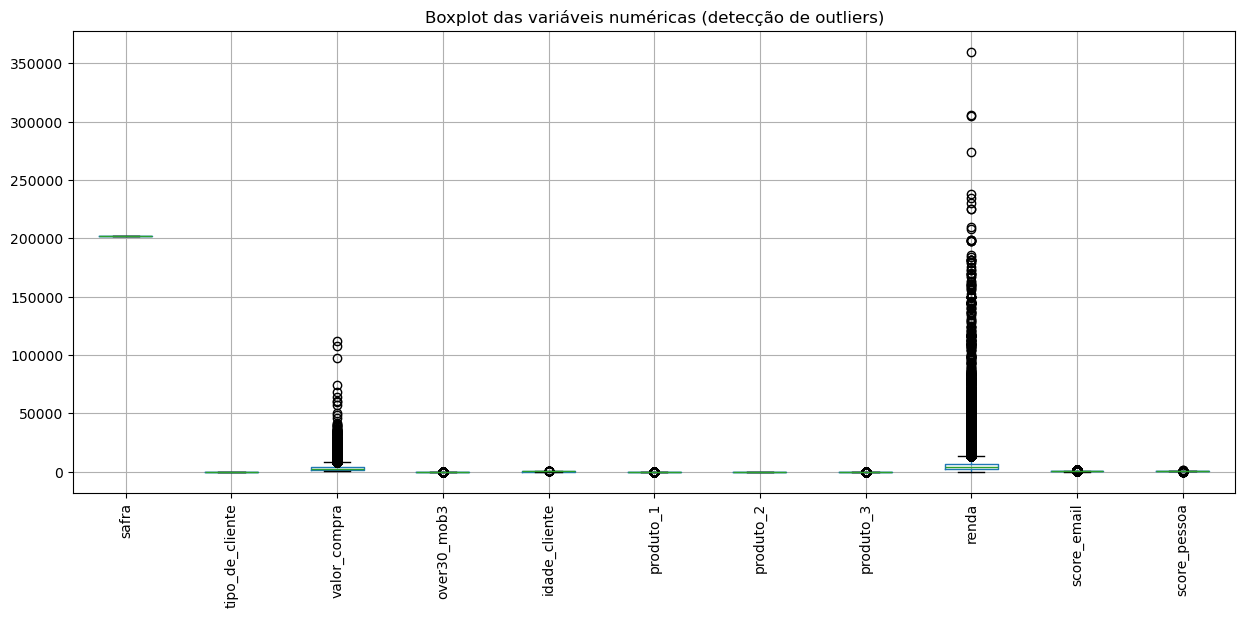

In [14]:
# Visualização com boxplot
plt.figure(figsize=(15,6))
df[num_cols].boxplot(rot=90)
plt.title("Boxplot das variáveis numéricas (detecção de outliers)")
plt.show()

# **Parte 6.1 - Detectar outliers pelo método IQR**

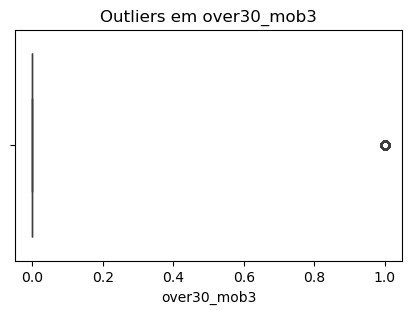

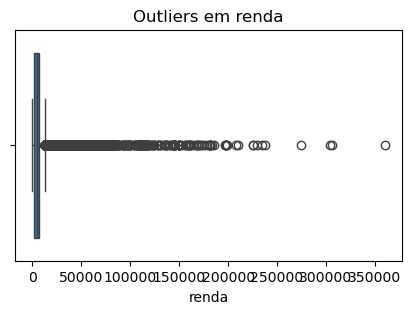

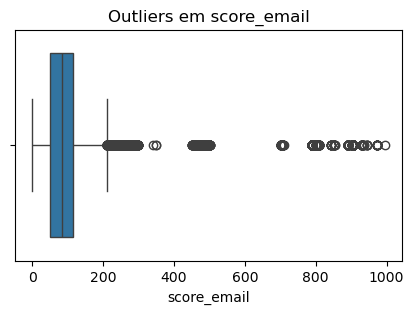

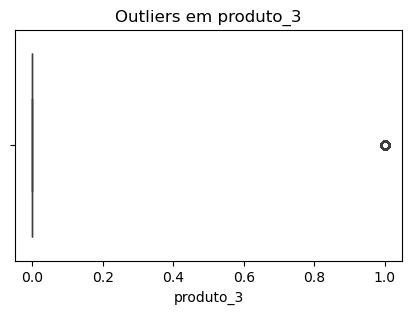

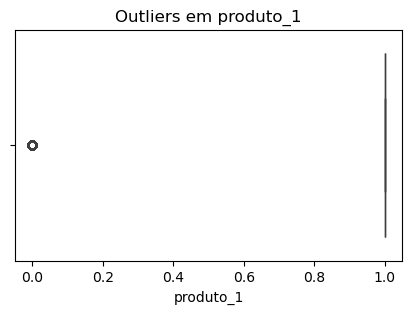

In [15]:
# Detectar outliers pelo método IQR
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    return len(outliers), lower, upper

outliers_summary = []

for col in num_cols:
    n_outliers, lower, upper = detect_outliers_iqr(df, col)
    outliers_summary.append([col, n_outliers, round(lower,2), round(upper,2)])

#
outliers_df = pd.DataFrame(outliers_summary, columns=["Variável", "Qtd_Outliers", "Limite_Inferior", "Limite_Superior"])

#
outliers_df["Percentual_Outliers"] = (outliers_df["Qtd_Outliers"] / len(df)) * 100
outliers_df.sort_values("Percentual_Outliers", ascending=False)

#
top_outliers = outliers_df.sort_values("Qtd_Outliers", ascending=False).head(5)["Variável"]

#
for col in top_outliers:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers em {col}")
    plt.show()

# **Parte 6.2 - Detectar outliers pelo método Z-Score**

In [ ]:
# Seleciona colunas numéricas (int64 e float64) para tratamento de outliers via Z-Score 
num_cols = df.select_dtypes(include=["int64", "float64"]).columns  # Index contendo nomes das colunas numéricas

# Remove coluna que NÃO será tratada com Z-Score (ex.: valores fora de domínio, já validado, etc.)
num_cols = num_cols.drop("over30_mob3")  # Retorna um novo Index sem a coluna informada 

# Exibe as colunas selecionadas para tratamento de outliers
num_cols


Index(['safra', 'tipo_de_cliente', 'valor_compra', 'idade_cliente',
       'produto_1', 'produto_2', 'produto_3', 'renda', 'score_email',
       'score_pessoa'],
      dtype='object')

In [17]:
# Calcular Z-score
z_scores = np.abs(stats.zscore(df[num_cols]))

# dataframe indicando outliers
outliers_mask = (z_scores > 3)

outliers_count = outliers_mask.sum(axis=0)

outliers_df = pd.DataFrame({
    "Variavel": num_cols,
    "Qtd_Outliers": outliers_count,
    "Percentual_Outliers": (outliers_count / len(df)) * 100
})

outliers_df.sort_values("Qtd_Outliers", ascending=False)

,Variavel,Qtd_Outliers,Percentual_Outliers
produto_3,produto_3,2526,7.691371
produto_1,produto_1,2049,6.238962
score_email,score_email,726,2.210584
valor_compra,valor_compra,560,1.705134
renda,renda,552,1.680775
idade_cliente,idade_cliente,78,0.237501
score_pessoa,score_pessoa,72,0.219231
safra,safra,0,0.000000
tipo_de_cliente,tipo_de_cliente,0,0.000000
produto_2,produto_2,0,0.000000


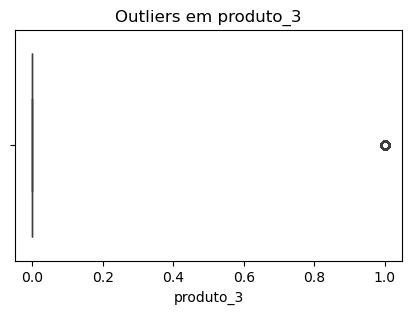

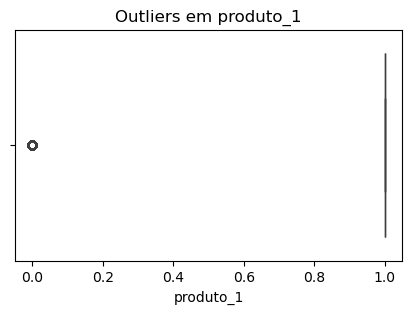

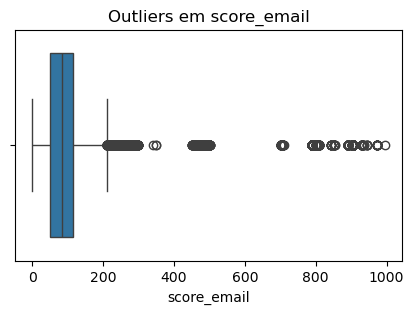

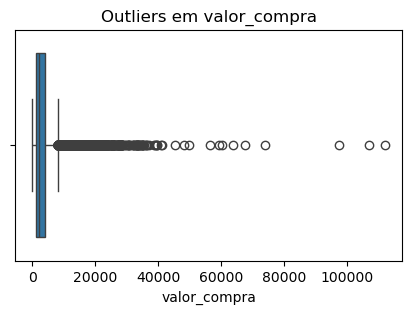

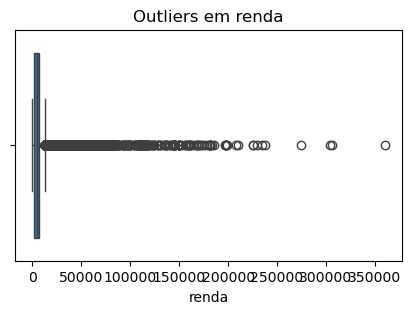

In [18]:
top_vars = outliers_df.sort_values("Qtd_Outliers", ascending=False).head(5)["Variavel"]

for col in top_vars:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers em {col}")
    plt.show()

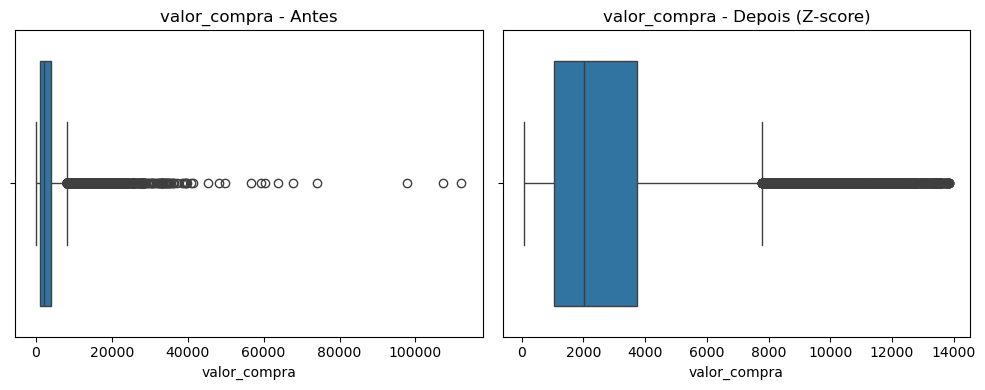

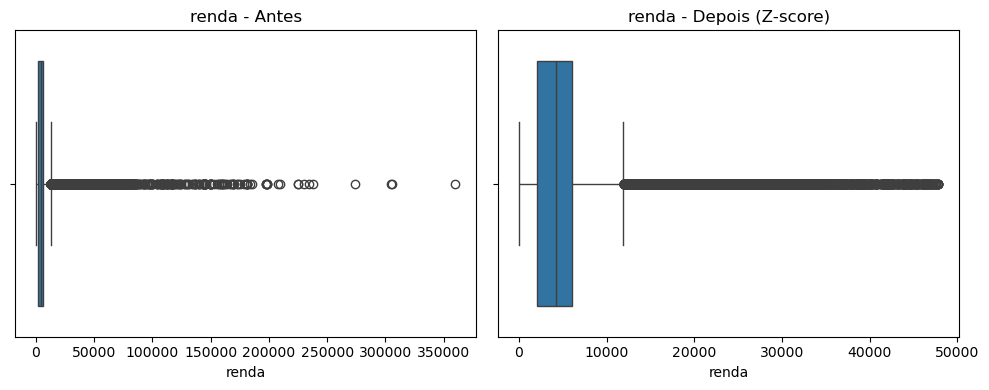

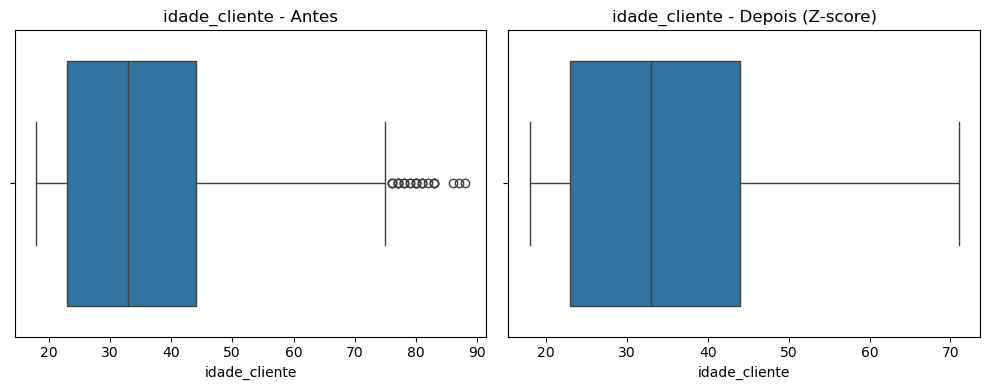

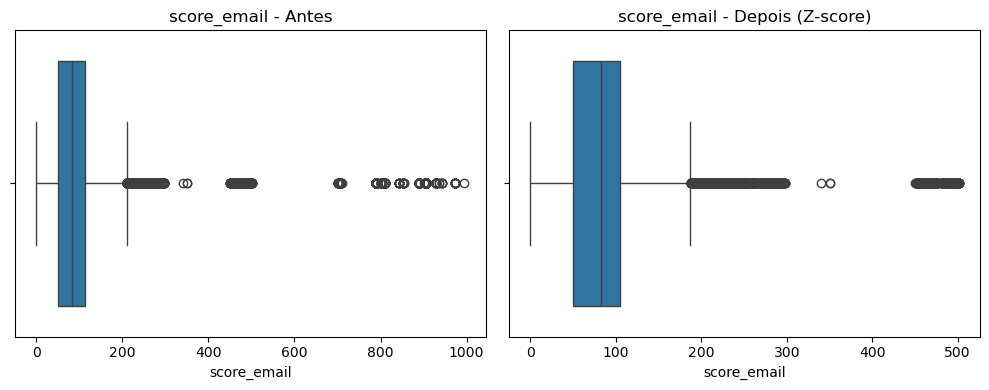

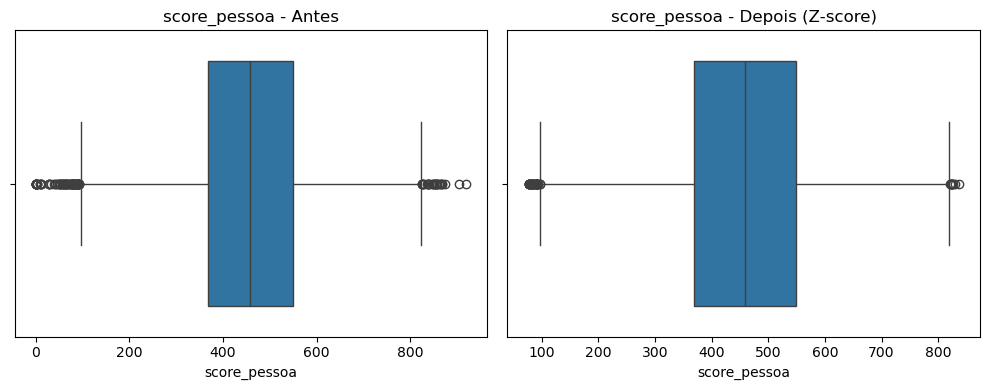

In [ ]:
# Colunas que terão outliers tratados via Z-score
cols_zscore = ["valor_compra", "renda", "idade_cliente", "score_email", "score_pessoa"]

# Cópia para preservar o DataFrame original
df_zscore = df.copy()

# Threshold de Z-score para considerar outlier
threshold = 3

# Substitui outliers pela mediana da própria coluna
for col in cols_zscore:
    z = np.abs(stats.zscore(df_zscore[col]))
    df_zscore[col] = np.where(
        z > threshold,
        df_zscore[col].median(),
        df_zscore[col]
    )

# Boxplot antes vs depois (por variável)
for col in cols_zscore:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    sns.boxplot(x=df[col], ax=ax[0])
    ax[0].set_title(f"{col} - Antes")

    sns.boxplot(x=df_zscore[col], ax=ax[1])
    ax[1].set_title(f"{col} - Depois (Z-score)")

    plt.tight_layout()
    plt.show()

**Análise**

- O tratamento de outliers foi realizado utilizando o método do Z-score, considerando valores com |z| > 3 como extremos.

- O procedimento foi aplicado apenas às variáveis contínuas (valor_compra, renda, idade_cliente, score_email e score_pessoa).

- Os valores identificados como outliers foram substituídos pela mediana da respectiva variável, reduzindo o impacto de valores extremos sem remover observações do conjunto de dados.

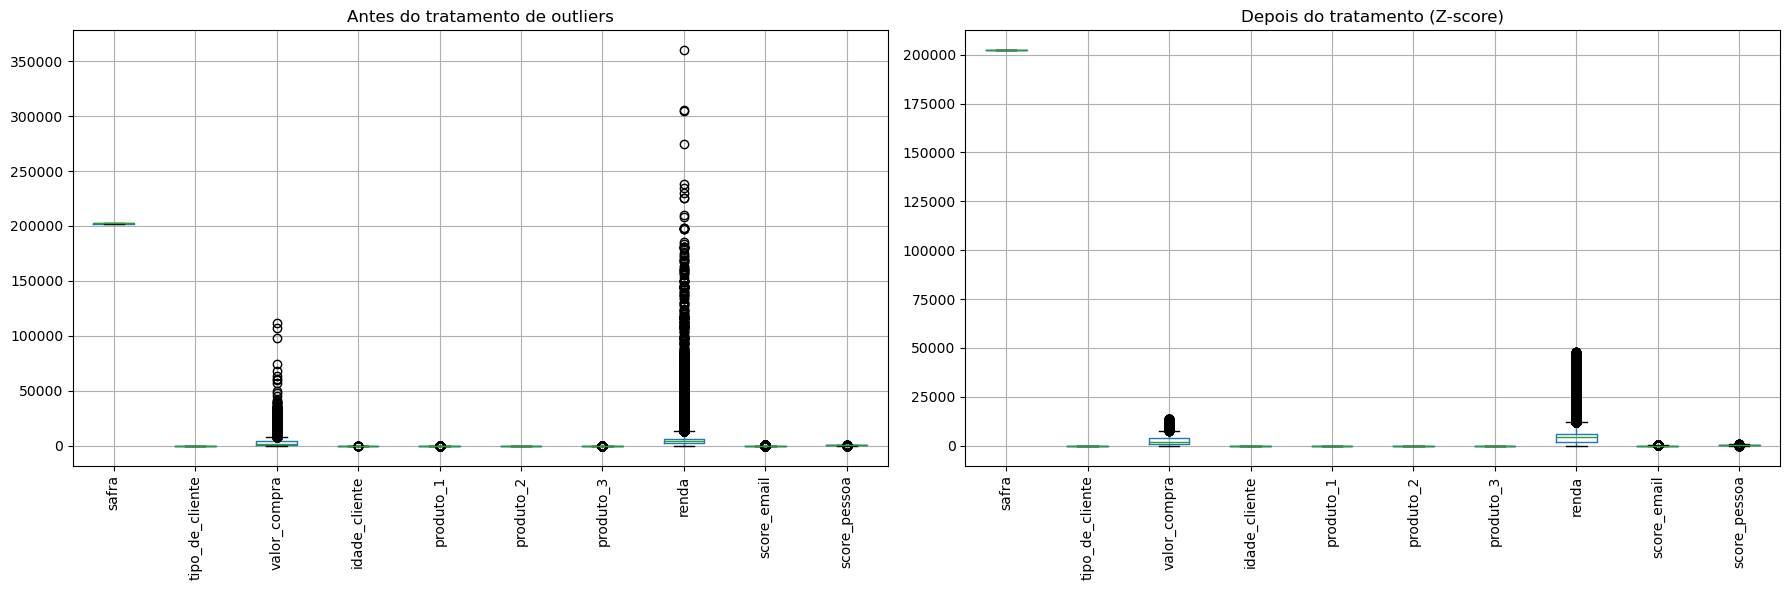

In [20]:
# Selecionar colunas numéricas (exceto target se quiser)
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Opcional: remover coluna alvo do tratamento
num_cols = [col for col in num_cols if col != "over30_mob3"]

# Copiar dataframe
df_zscore = df.copy()

threshold = 3

# Aplicar Z-score em todas as colunas numéricas
for col in num_cols:
    z = np.abs(stats.zscore(df_zscore[col], nan_policy='omit'))
    df_zscore[col] = np.where(z > threshold,
                               df_zscore[col].median(),
                               df_zscore[col])

# Plot antes e depois
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Antes
df[num_cols].boxplot(rot=90, ax=ax[0])
ax[0].set_title("Antes do tratamento de outliers")

# Depois
df_zscore[num_cols].boxplot(rot=90, ax=ax[1])
ax[1].set_title("Depois do tratamento (Z-score)")

plt.tight_layout()
plt.show()

**Análise Antes e Depois do Tratamento de Outliers (Z-score)**

O gráfico apresenta a comparação entre a distribuição das variáveis numéricas antes e após o tratamento de outliers utilizando o método do **Z-score (threshold = 3)**.

**Antes do tratamento**

* Observa-se grande concentração de valores extremos principalmente nas variáveis:

  * `valor_compra`
  * `renda`
  * `id_trx`
* Essas variáveis apresentam caudas longas e muitos pontos fora dos limites do boxplot, indicando forte assimetria e presença de outliers.
* Tais valores podem impactar negativamente modelos de machine learning, principalmente algoritmos sensíveis à escala (ex: regressão logística, KNN, redes neurais).

**Depois do tratamento (Z-score)**

* Os valores extremos foram substituídos pela **mediana da variável**, reduzindo significativamente a dispersão.
* As distribuições tornaram-se mais compactas e estáveis.
* Houve redução clara de:

  * variância excessiva,
  * influência de observações anômalas,
  * distorções nos boxplots.

**Observações importantes:**

* A variável alvo `over30_mob3` não foi tratada, pois é binária (0/1) e não representa um valor contínuo sujeito a outliers.
* Variáveis categóricas codificadas (ex: `produto_1`, `produto_2`, `produto_3`) não sofreram impacto relevante, pois já estão em domínio discreto.

**Conclusão**

O tratamento de outliers via Z-score contribuiu para:

* melhorar a qualidade dos dados,
* tornar as distribuições mais homogêneas,
* reduzir ruídos extremos,
* preparar a base para aplicação de modelos preditivos de forma mais robusta.

Este passo é essencial antes da etapa de modelagem, principalmente em problemas de risco de crédito e inadimplência.

# **Parte 7 - Feature Engineering (LabelEncoderEncoding)**

In [21]:
# Identificar colunas categóricas
cat_cols = df.select_dtypes(include=["object", "bool"]).columns
cat_cols

Index(['provedor_email', 'uf', 'dia_semana'], dtype='object')

In [ ]:
# Inicializa o codificador de rótulos (mapeia categorias para inteiros)
le = LabelEncoder()  # Ex.: ["SP", "RJ"] -> [1, 0] (depende da ordem interna)

# Converte cada coluna categórica para string e aplica label encoding
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))  # astype(str) evita erro com NaN/mistos

# Mostra o tipo (dtype) final de cada coluna do DataFrame
df.dtypes  # Retorna uma Series com o dtype por coluna 


safra                       int64
data_compra        datetime64[ns]
hora_da_compra              int32
tipo_de_cliente             int64
valor_compra              float64
over30_mob3                 Int64
provedor_email              int32
idade_cliente             float64
produto_1                   int64
produto_2                   int64
produto_3                   int64
uf                          int32
renda                     float64
score_email               float64
score_pessoa              float64
dia_semana                  int32
dtype: object

In [23]:
# Visualizando dataset
df

,safra,data_compra,hora_da_compra,tipo_de_cliente,valor_compra,over30_mob3,provedor_email,idade_cliente,produto_1,produto_2,produto_3,uf,renda,score_email,score_pessoa,dia_semana
0,202212,2022-12-30,0,1,1085.87,0,297,33.0,1,0,0,26,1600.0,82.0,309.0,0
1,202303,2023-03-03,0,1,1686.34,0,297,34.0,1,0,0,26,4250.0,85.0,322.0,0
2,202302,2023-02-02,0,1,2807.66,0,635,28.0,1,0,0,26,1700.0,82.0,514.0,4
3,202303,2023-03-27,0,1,333.92,1,255,53.0,1,0,0,18,2950.0,50.0,441.0,1
4,202303,2023-03-06,0,1,2721.98,0,297,34.0,1,1,1,4,3650.0,190.0,474.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32837,202303,2023-03-24,0,2,6431.54,0,255,28.0,1,1,0,0,4250.0,5.0,341.0,0
32838,202211,2022-11-19,0,2,1702.78,1,726,33.0,1,0,0,26,1500.0,137.0,290.0,2
32839,202212,2022-12-10,0,2,6515.57,0,297,39.0,1,1,0,11,7150.0,90.0,527.0,2
32840,202301,2023-01-29,0,2,1320.00,0,255,34.0,1,0,0,26,3700.0,79.0,483.0,3


# Parte 8 - Divisão x e y

In [ ]:
# Define o nome da variável alvo (coluna que o modelo vai prever)
target = "over30_mob3"

# Define colunas que não entram como features (target, id e data)
cols_drop = ["over30_mob3", "id_trx", "data_compra"]

# Monta X (features) removendo as colunas acima; errors="ignore" evita erro se alguma não existir
X = df.drop(columns=cols_drop, errors="ignore")  # Drop remove colunas pelo nome

# Monta y (target) selecionando a coluna alvo
y = df[target]  # Selecionar uma coluna retorna uma Series 

# **Parte 9 - Train / Test split**

In [ ]:
from sklearn.model_selection import train_test_split  # Função para dividir dados em treino e teste 

# Divide X e y em conjuntos de treino e teste (80%/20%), mantendo a proporção das classes 
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% para teste 
    random_state=42,    # Reprodutibilidade do split 
    stratify=y          # Split estratificado pelo target (mesma distribuição de classes)
)

# **Parte 10 - SMOTE**

In [ ]:
# Importa a técnica SMOTE para balancear classes
from imblearn.over_sampling import SMOTE

# Objeto SMOTE com semente fixa para reprodutibilidade
smote = SMOTE(random_state=42)

# Aplica o SMOTE nos dados de treino para gerar novas amostras da classe minoritária
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Mostra a quantidade de amostras por classe antes do balanceamento
print("Antes do SMOTE:")
print(y_train.value_counts())

# Mostra a quantidade de amostras por classe depois do balanceamento
print("Depois do SMOTE:")
print(pd.Series(y_train_res).value_counts())

# Exibe o objeto SMOTE criado
smote

Antes do SMOTE:
over30_mob3
0    22949
1     3324
Name: count, dtype: Int64
Depois do SMOTE:
over30_mob3
0    22949
1    22949
Name: count, dtype: Int64


SMOTE(random_state=42)

In [ ]:
# Cria a coluna "ano" a partir da data de compra
df["ano"] = df["data_compra"].dt.year

# Cria a coluna "mes" a partir da data de compra
df["mes"] = df["data_compra"].dt.month

# Cria a coluna "dia" a partir da data de compra
df["dia"] = df["data_compra"].dt.day

# Cria a coluna "dia_semana" (0 = segunda, 6 = domingo) a partir da data de compra
df["dia_semana"] = df["data_compra"].dt.weekday

# Remove a coluna original de data, pois já foi transformada em novas variáveis
df = df.drop(columns=["data_compra"])

# Exibe o DataFrame final após as transformações
df

,safra,hora_da_compra,tipo_de_cliente,valor_compra,over30_mob3,provedor_email,idade_cliente,produto_1,produto_2,produto_3,uf,renda,score_email,score_pessoa,dia_semana,ano,mes,dia
0,202212,0,1,1085.87,0,297,33.0,1,0,0,26,1600.0,82.0,309.0,4,2022,12,30
1,202303,0,1,1686.34,0,297,34.0,1,0,0,26,4250.0,85.0,322.0,4,2023,3,3
2,202302,0,1,2807.66,0,635,28.0,1,0,0,26,1700.0,82.0,514.0,3,2023,2,2
3,202303,0,1,333.92,1,255,53.0,1,0,0,18,2950.0,50.0,441.0,0,2023,3,27
4,202303,0,1,2721.98,0,297,34.0,1,1,1,4,3650.0,190.0,474.0,0,2023,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32837,202303,0,2,6431.54,0,255,28.0,1,1,0,0,4250.0,5.0,341.0,4,2023,3,24
32838,202211,0,2,1702.78,1,726,33.0,1,0,0,26,1500.0,137.0,290.0,5,2022,11,19
32839,202212,0,2,6515.57,0,297,39.0,1,1,0,11,7150.0,90.0,527.0,5,2022,12,10
32840,202301,0,2,1320.00,0,255,34.0,1,0,0,26,3700.0,79.0,483.0,6,2023,1,29


# **Parte 11 - Modelo machine learning**

In [ ]:
# Função para encontrar o melhor valor de k no modelo KNN
def find_best_k_knn(X, y, k_range=range(3, 21), cv=5):
    results = []
    
    # Testa vários valores de k
    for k in tqdm(k_range, desc="Testando valores de k (KNN)"):
        model = KNeighborsClassifier(n_neighbors=k)
        
        # Avalia o modelo usando validação cruzada
        scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
        
        # Salva o resultado médio de acurácia
        results.append({
            "k": k,
            "mean_accuracy": scores.mean()
        })
    
    # Converte os resultados em DataFrame
    results_df = pd.DataFrame(results)
    
    # Encontra o melhor valor de k (maior acurácia média)
    best_k = results_df.loc[results_df["mean_accuracy"].idxmax()]
    
    return results_df, best_k


# Função para encontrar o melhor valor de max_depth no modelo Decision Tree
def find_best_depth_decision_tree(X, y, depth_range=range(2, 21), cv=5):
    results = []
    
    # Testa vários valores de profundidade da árvore
    for depth in tqdm(depth_range, desc="Testando max_depth (Decision Tree)"):
        model = DecisionTreeClassifier(
            max_depth=depth,
            random_state=42,
            class_weight="balanced"
        )
        
        # Avalia o modelo usando validação cruzada
        scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
        
        # Salva o resultado médio de acurácia
        results.append({
            "max_depth": depth,
            "mean_accuracy": scores.mean()
        })
    
    # Converte os resultados em DataFrame
    results_df = pd.DataFrame(results)
    
    # Encontra o melhor valor de max_depth
    best_depth = results_df.loc[results_df["mean_accuracy"].idxmax()]
    
    return results_df, best_depth


# Função para encontrar o melhor número de árvores (n_estimators) no Random Forest
def find_best_n_estimators_rf(X, y, n_range=[50, 100, 200, 300, 500], cv=5):
    results = []
    
    # Testa diferentes quantidades de árvores
    for n in tqdm(n_range, desc="Testando n_estimators (Random Forest)"):
        model = RandomForestClassifier(
            n_estimators=n,
            random_state=42,
            class_weight="balanced"
        )
        
        # Avalia o modelo usando validação cruzada
        scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
        
        # Salva o resultado médio de acurácia
        results.append({
            "n_estimators": n,
            "mean_accuracy": scores.mean()
        })
    
    # Converte os resultados em DataFrame
    results_df = pd.DataFrame(results)
    
    # Encontra o melhor valor de n_estimators
    best_n = results_df.loc[results_df["mean_accuracy"].idxmax()]
    
    return results_df, best_n


# Executa as funções para encontrar os melhores parâmetros
knn_results, best_knn = find_best_k_knn(X_train_res, y_train_res)
dt_results, best_dt = find_best_depth_decision_tree(X_train_res, y_train_res)
rf_results, best_rf = find_best_n_estimators_rf(X_train_res, y_train_res)


# Extrai os melhores valores encontrados
best_k = int(best_knn["k"])
best_depth = int(best_dt["max_depth"])
best_rf_n = int(best_rf["n_estimators"])


# Mostra os melhores parâmetros encontrados
print("Melhor k:", best_k)
print("Melhor max_depth:", best_depth)
print("Melhor n_estimators RF:", best_rf_n)

Testando n_estimators (Random Forest): 100%|██████████| 5/5 [11:24<00:00, 136.93s/it]

Melhor k: 4
Melhor max_depth: 17
Melhor n_estimators RF: 500


**Análise**

- Foram realizados testes de hiperparâmetros para KNN (n_neighbors) e Decision Tree (max_depth) utilizando validação cruzada. Os melhores valores foram incorporados ao treinamento final dos modelos, buscando melhorar a capacidade preditiva especialmente na identificação de clientes inadimplentes.

In [29]:
from collections import Counter

counter = Counter(y_train_res)

scale_pos_weight = counter[0] / counter[1]

print("Distribuição das classes:", counter)
print("scale_pos_weight:", scale_pos_weight)


Distribuição das classes: Counter({0: 22949, 1: 22949})
scale_pos_weight: 1.0


In [ ]:
%%time

# Dicionário com os modelos de Machine Learning que serão testados
models = {
    "Naive Bayes": GaussianNB(),
    
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight="balanced"
    ),
    
    "Random Forest": RandomForestClassifier(
        n_estimators=best_rf_n,
        random_state=42,
        class_weight="balanced"
    ),
    
    "Decision Tree": DecisionTreeClassifier(
        random_state=42,
        max_depth=best_depth,
        class_weight="balanced"
    ),
    
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    
    "KNN": KNeighborsClassifier(n_neighbors=best_k),
    
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        random_state=42,
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False
    ),
    
    "LightGBM": LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        num_leaves=31,
        random_state=42,
        class_weight="balanced"
    ),
    
    "CatBoost": CatBoostClassifier(
        iterations=300,
        learning_rate=0.05,
        depth=6,
        random_state=42,
        verbose=0,
        auto_class_weights="Balanced"
    )
}

# Lista para armazenar os resultados
results = []

# Loop para treinar e avaliar cada modelo
for name, model in tqdm(models.items(), desc="Treinando modelos"):
    
    # Treina o modelo usando os dados balanceados de treino
    model.fit(X_train_res, y_train_res)
    
    # Realiza previsões no conjunto de teste
    y_pred = model.predict(X_test)
    
    # Calcula as métricas de avaliação
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
    f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0)
    
    # Armazena os resultados em uma lista
    results.append({
        "Modelo": name,
        "Accuracy": acc,
        "Recall": recall,
        "F1-score": f1
    })
    
    # Exibe os resultados de cada modelo
    print(f"\nModelo: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Recall (Inadimplente): {recall:.4f}")
    print(f"F1-score (Inadimplente): {f1:.4f}")

# Cria um DataFrame final com os resultados e ordena pelo Recall
results_df = pd.DataFrame(results).sort_values("Recall", ascending=False)

# Exibe a tabela final de resultados
results_df

Treinando modelos:   0%|          | 0/9 [00:00<?, ?it/s]


Modelo: Naive Bayes
Accuracy: 0.5247
Recall (Inadimplente): 0.7292
F1-score (Inadimplente): 0.2796


Treinando modelos:  22%|██▏       | 2/9 [00:01<00:03,  1.96it/s]


Modelo: Logistic Regression
Accuracy: 0.6130
Recall (Inadimplente): 0.6438
F1-score (Inadimplente): 0.2962


Treinando modelos:  33%|███▎      | 3/9 [01:22<03:24, 34.09s/it]


Modelo: Random Forest
Accuracy: 0.8309
Recall (Inadimplente): 0.1697
F1-score (Inadimplente): 0.2024


Treinando modelos:  44%|████▍     | 4/9 [01:22<01:48, 21.64s/it]


Modelo: Decision Tree
Accuracy: 0.7389
Recall (Inadimplente): 0.3165
F1-score (Inadimplente): 0.2347


Treinando modelos:  56%|█████▌    | 5/9 [01:40<01:21, 20.27s/it]


Modelo: Gradient Boosting
Accuracy: 0.7919
Recall (Inadimplente): 0.2491
F1-score (Inadimplente): 0.2325


Treinando modelos:  67%|██████▋   | 6/9 [01:40<00:41, 13.69s/it]


Modelo: KNN
Accuracy: 0.6975
Recall (Inadimplente): 0.2972
F1-score (Inadimplente): 0.1991


c:\Users\rafae.RAFAEL_NOTEBOOK\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:11:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
Treinando modelos:  78%|███████▊  | 7/9 [01:41<00:19,  9.60s/it]


Modelo: XGBoost
Accuracy: 0.8312
Recall (Inadimplente): 0.1576
F1-score (Inadimplente): 0.1911
[LightGBM] [Info] Number of positive: 22949, number of negative: 22949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1661
[LightGBM] [Info] Number of data points in the train set: 45898, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\rafae.RAFAEL_NOTEBOOK\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\rafae.RAFAEL_NOTEBOOK\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\rafae.RAFAEL_NOTEBOOK\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rafae.RAFAEL_NOTEBOOK\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\rafae.RAFAEL_NOTEBOOK\anaconda3


Modelo: LightGBM
Accuracy: 0.8496
Recall (Inadimplente): 0.1047
F1-score (Inadimplente): 0.1497


Treinando modelos: 100%|██████████| 9/9 [01:45<00:00, 11.74s/it]


Modelo: CatBoost
Accuracy: 0.8327
Recall (Inadimplente): 0.1492
F1-score (Inadimplente): 0.1841
CPU times: total: 2min 18s
Wall time: 1min 45s


,Modelo,Accuracy,Recall,F1-score
0,Naive Bayes,0.524737,0.729242,0.279649
1,Logistic Regression,0.613031,0.643803,0.296235
3,Decision Tree,0.738925,0.316486,0.234717
5,KNN,0.697519,0.297232,0.199113
4,Gradient Boosting,0.791901,0.249097,0.232454
2,Random Forest,0.830872,0.169675,0.202441
6,XGBoost,0.831177,0.157641,0.191101
8,CatBoost,0.832699,0.149218,0.184113
7,LightGBM,0.849597,0.104693,0.149742


C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_37340\590296859.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_37340\590296859.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_37340\590296859.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_37340\590296859.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

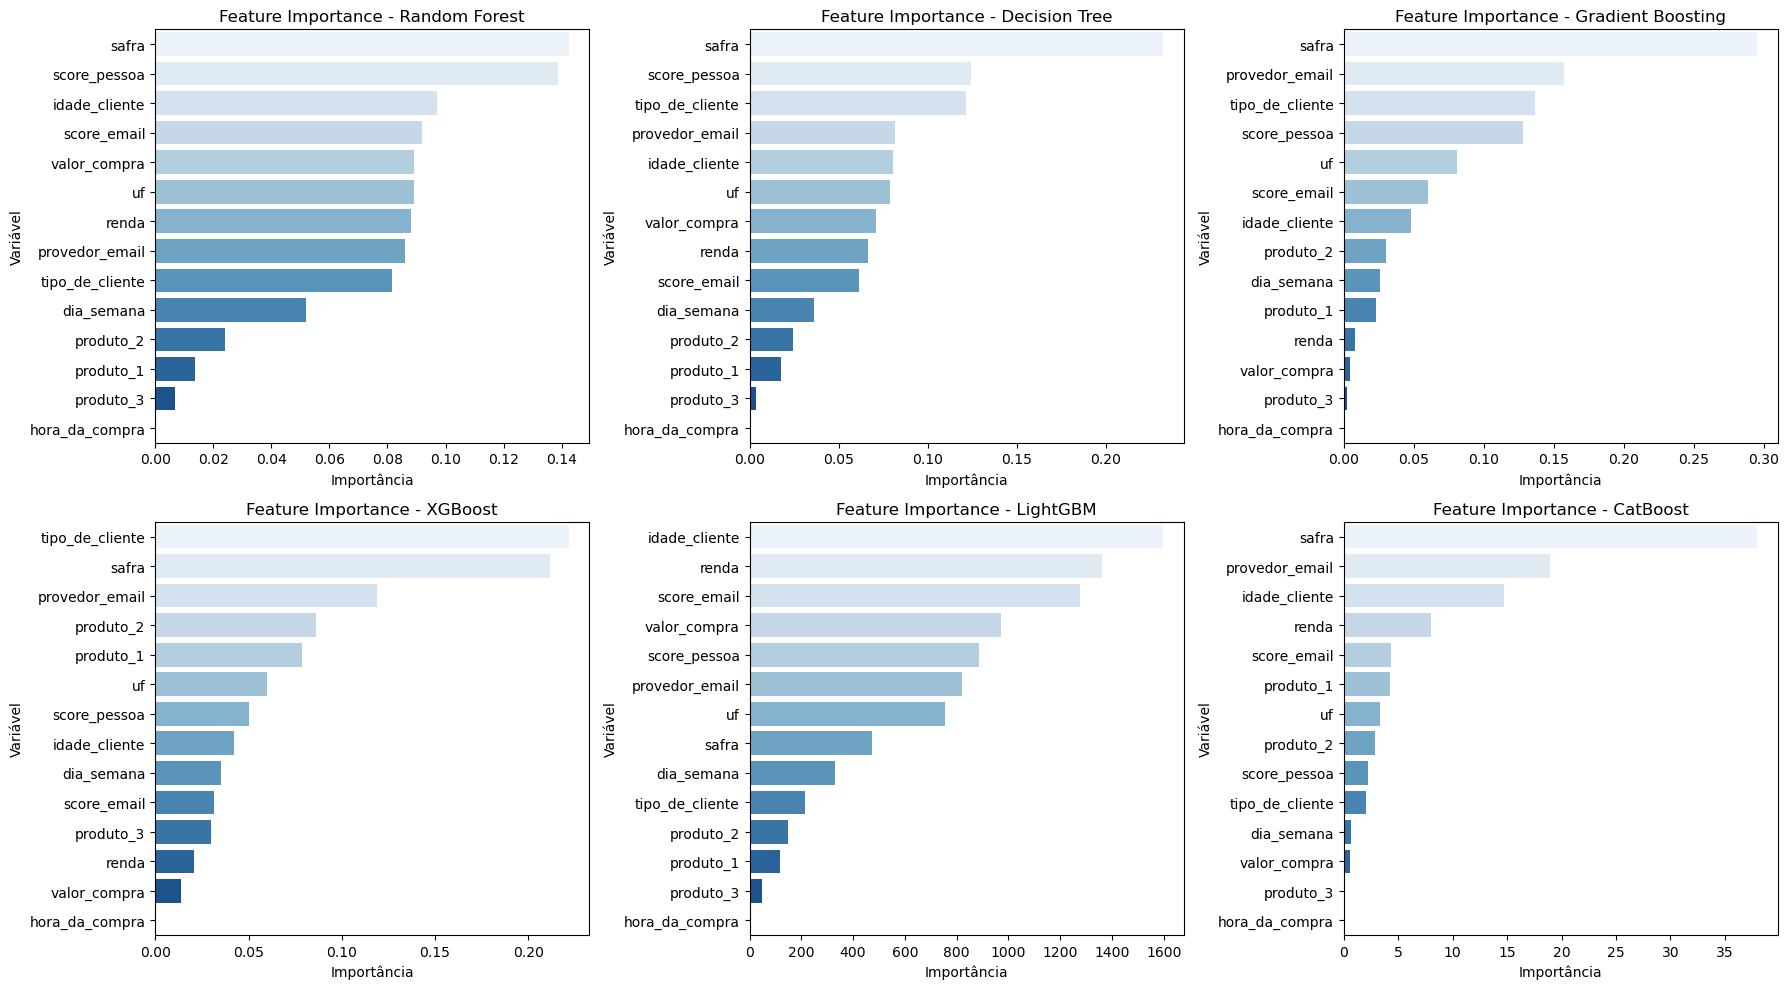

In [ ]:
# Cria a figura com vários subplots (2 linhas e 3 colunas)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

i = 0  # Contador para controlar em qual gráfico será desenhado

# Percorre todos os modelos
for name, model in models.items():
    
    # Verifica se o modelo possui o atributo feature_importances_
    if hasattr(model, "feature_importances_"):
        
        # Obtém os valores de importância das variáveis
        importances = model.feature_importances_
        features = X_train_res.columns
        
        # Cria um DataFrame com as features e suas importâncias
        df_imp = pd.DataFrame({
            "Feature": features,
            "Importance": importances
        }).sort_values("Importance", ascending=False).head(15)
        
        # Cria o gráfico de barras das 15 variáveis mais importantes
        sns.barplot(
            data=df_imp,
            x="Importance",
            y="Feature",
            ax=axes[i],
            palette="Blues"
        )
        
        # Define o título e os rótulos do gráfico
        axes[i].set_title(f"Feature Importance - {name}")
        axes[i].set_xlabel("Importância")
        axes[i].set_ylabel("Variável")
        
        i += 1  # Avança para o próximo subplot

# Remove os gráficos que não foram usados
for j in range(i, len(axes)):
    fig.delaxes(axes[j])

# Ajusta o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibe os gráficos
plt.show()

# **Parte 12 - Métricas e avaliações**

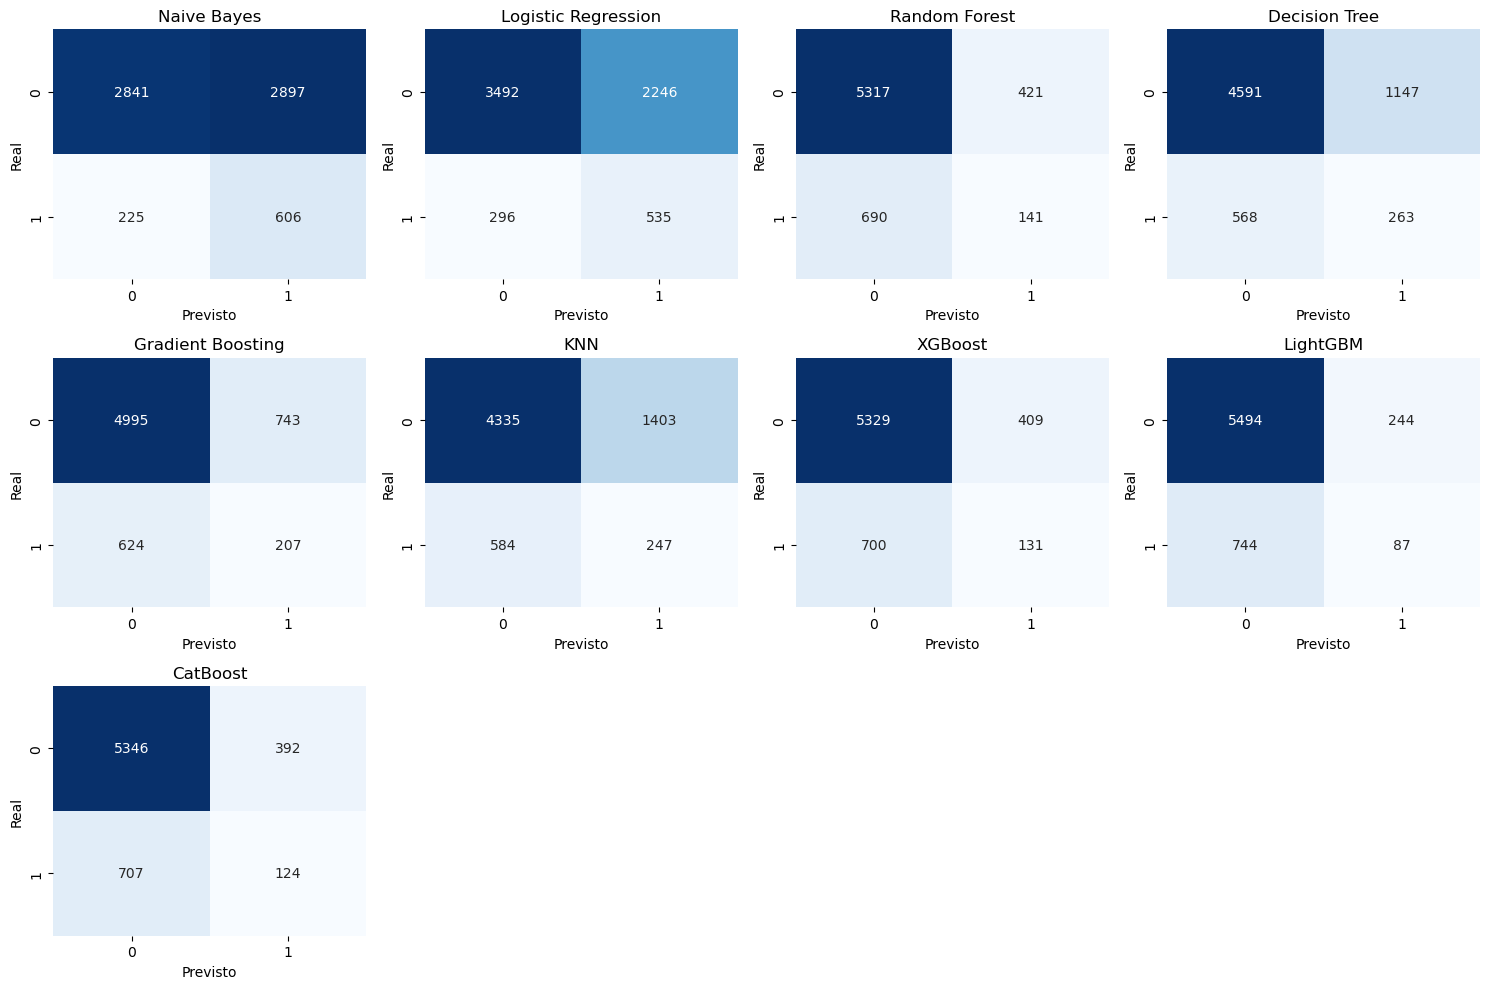

In [ ]:
# Cria uma figura com 3 linhas e 4 colunas de gráficos
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

# Loop para gerar a matriz de confusão de cada modelo
for ax, (name, model) in zip(axes, models.items()):
    
    # Faz a previsão no conjunto de teste
    y_pred = model.predict(X_test)
    
    # Calcula a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    
    # Desenha o heatmap da matriz de confusão
    sns.heatmap(
        cm,
        annot=True,      # Mostra os valores dentro das células
        fmt="d",         # Formato inteiro
        cmap="Blues",    # Paleta de cores azul
        cbar=False,      # Remove a barra lateral de cores
        ax=ax
    )
    
    # Define o título e os rótulos dos eixos
    ax.set_title(name)
    ax.set_xlabel("Previsto")
    ax.set_ylabel("Real")

# Remove os gráficos que não foram utilizados
for i in range(len(models), len(axes)):
    fig.delaxes(axes[i])

# Ajusta o layout para evitar sobreposição dos gráficos
plt.tight_layout()

# Exibe todos os gráficos
plt.show()

In [ ]:
# Gera o Classification Report para cada modelo
for name, model in models.items():
    
    # Faz a previsão no conjunto de teste
    y_pred = model.predict(X_test)
    
    # Linha separadora
    print("="*60)
    print(f"Classification Report - {name}")
    print("="*60)
    
    # Exibe o relatório de classificação com métricas detalhadas
    print(classification_report(
        y_test,                      # Valores reais
        y_pred,                      # Valores previstos
        target_names=["Adimplente (0)", "Inadimplente (1)"],  # Nome das classes
        zero_division=0              # Evita erro de divisão por zero
    ))

Classification Report - Naive Bayes
                  precision    recall  f1-score   support

  Adimplente (0)       0.93      0.50      0.65      5738
Inadimplente (1)       0.17      0.73      0.28       831

        accuracy                           0.52      6569
       macro avg       0.55      0.61      0.46      6569
    weighted avg       0.83      0.52      0.60      6569

Classification Report - Logistic Regression
                  precision    recall  f1-score   support

  Adimplente (0)       0.92      0.61      0.73      5738
Inadimplente (1)       0.19      0.64      0.30       831

        accuracy                           0.61      6569
       macro avg       0.56      0.63      0.51      6569
    weighted avg       0.83      0.61      0.68      6569

Classification Report - Random Forest
                  precision    recall  f1-score   support

  Adimplente (0)       0.89      0.93      0.91      5738
Inadimplente (1)       0.25      0.17      0.20       831

    

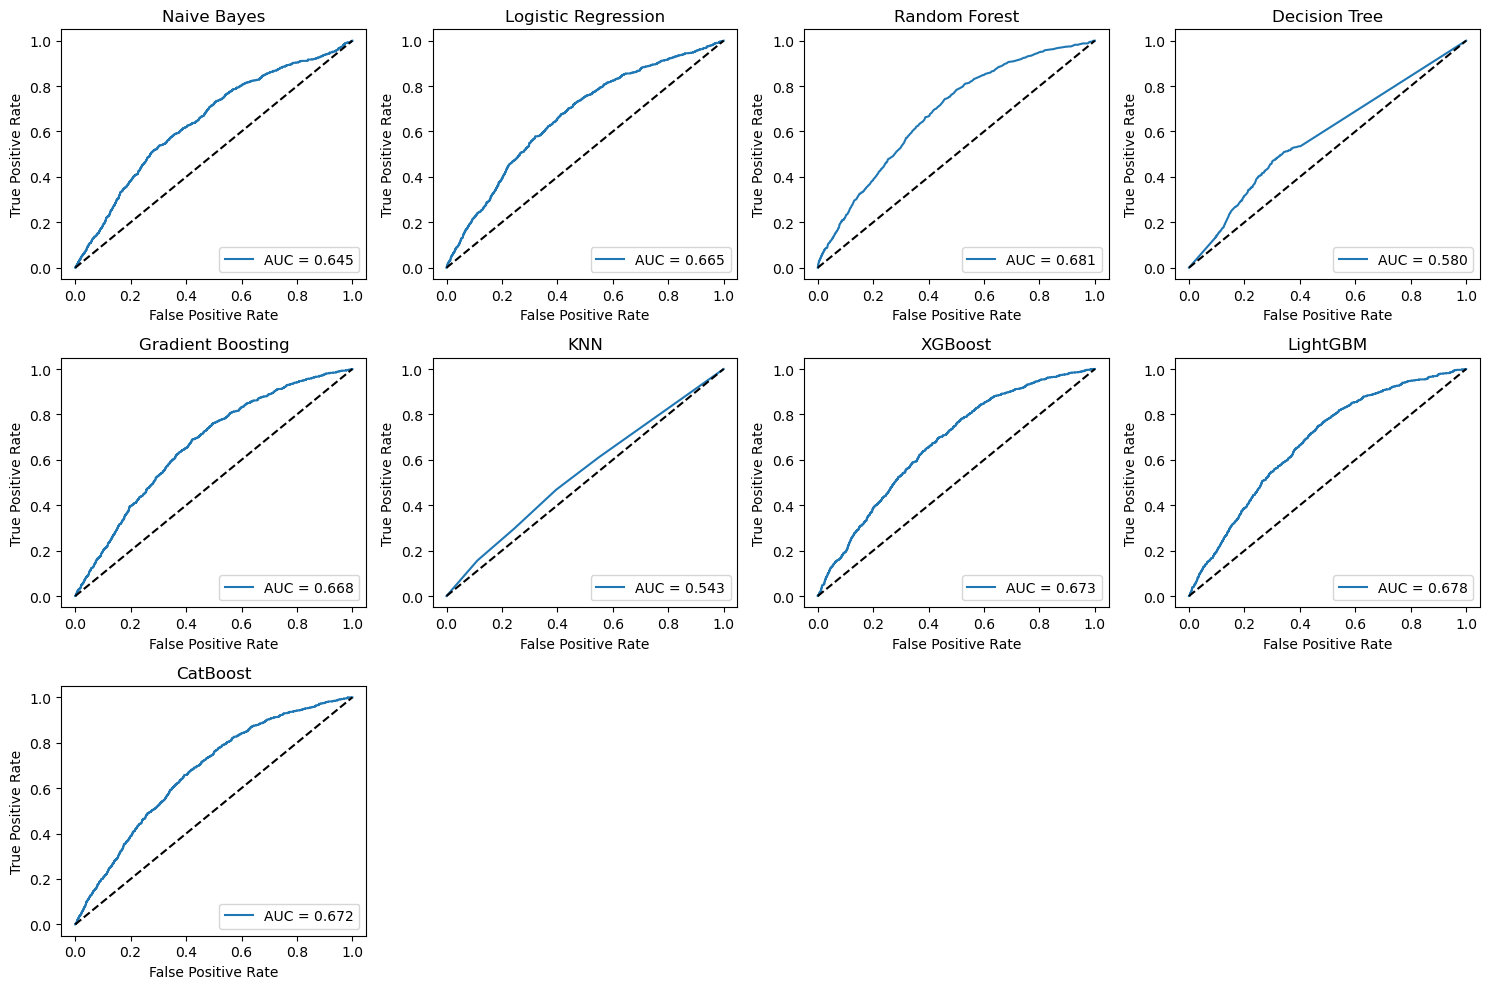

In [ ]:
# Cria uma figura com 3 linhas e 4 colunas de gráficos
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

# Loop para gerar a curva ROC de cada modelo
for ax, (name, model) in zip(axes, models.items()):
    
    # Obtém as probabilidades da classe positiva (inadimplente)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # Caso o modelo não tenha predict_proba, usa decision_function
        y_proba = model.decision_function(X_test)
    
    # Calcula os valores da curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    
    # Calcula a área sob a curva (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Plota a curva ROC
    ax.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    
    # Plota a linha de referência (modelo aleatório)
    ax.plot([0, 1], [0, 1], "k--")
    
    # Define título e rótulos dos eixos
    ax.set_title(name)
    ax.set_xlabel("False Positive Rate (Taxa de Falsos Positivos)")
    ax.set_ylabel("True Positive Rate (Taxa de Verdadeiros Positivos)")
    
    # Mostra a legenda
    ax.legend(loc="lower right")

# Remove os gráficos que não foram utilizados
for i in range(len(models), len(axes)):
    fig.delaxes(axes[i])

# Ajusta o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibe todos os gráficos
plt.show()

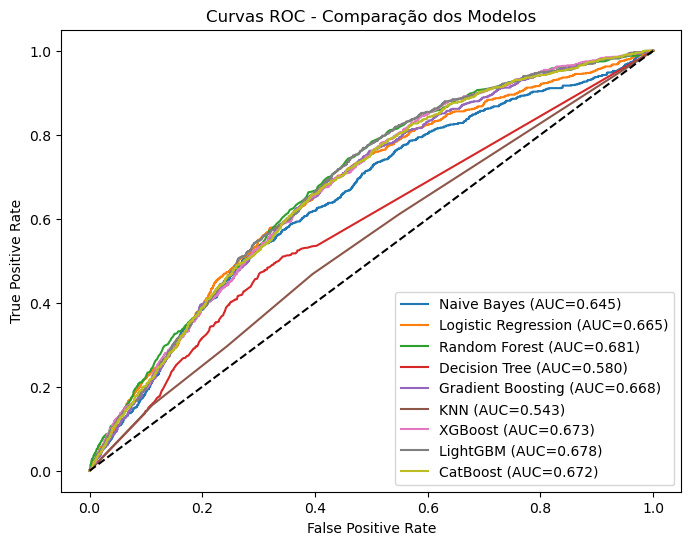

In [35]:
# Curva ROC em um único gráfico (todas juntas)
plt.figure(figsize=(8,6))

for name, model in models.items():
    
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
    else:
        y_proba = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC - Comparação dos Modelos")
plt.legend()
plt.show()

In [36]:
# Salvando os modelos para produção
save_path = r"C:\Users\rafae.RAFAEL_NOTEBOOK\Downloads\Case_tecnico_Koin\models"
os.makedirs(save_path, exist_ok=True)

trained_models = {}

for name, model in tqdm(models.items(), desc="Treinando e salvando modelos"):
       
    # Guardar em dicionário
    trained_models[name] = model
    
    # Nome do arquivo
    filename = name.replace(" ", "_").lower() + ".pkl"
    filepath = os.path.join(save_path, filename)
    
    # Salvar modelo
    joblib.dump(model, filepath)
    
    print(f"Modelo salvo: {filepath}")

Treinando e salvando modelos:   0%|          | 0/9 [00:00<?, ?it/s]

Modelo salvo: C:\Users\rafae.RAFAEL_NOTEBOOK\Downloads\Case_tecnico_Koin\models\naive_bayes.pkl
Modelo salvo: C:\Users\rafae.RAFAEL_NOTEBOOK\Downloads\Case_tecnico_Koin\models\logistic_regression.pkl


Treinando e salvando modelos: 100%|██████████| 9/9 [00:00<00:00, 19.04it/s]

Modelo salvo: C:\Users\rafae.RAFAEL_NOTEBOOK\Downloads\Case_tecnico_Koin\models\random_forest.pkl
Modelo salvo: C:\Users\rafae.RAFAEL_NOTEBOOK\Downloads\Case_tecnico_Koin\models\decision_tree.pkl
Modelo salvo: C:\Users\rafae.RAFAEL_NOTEBOOK\Downloads\Case_tecnico_Koin\models\gradient_boosting.pkl
Modelo salvo: C:\Users\rafae.RAFAEL_NOTEBOOK\Downloads\Case_tecnico_Koin\models\knn.pkl
Modelo salvo: C:\Users\rafae.RAFAEL_NOTEBOOK\Downloads\Case_tecnico_Koin\models\xgboost.pkl
Modelo salvo: C:\Users\rafae.RAFAEL_NOTEBOOK\Downloads\Case_tecnico_Koin\models\lightgbm.pkl
Modelo salvo: C:\Users\rafae.RAFAEL_NOTEBOOK\Downloads\Case_tecnico_Koin\models\catboost.pkl


# **Parte 13 - Resultado final**

In [37]:
# Garantir formato correto
X_test = pd.DataFrame(X_test, columns=X_train_res.columns)
y_test = np.array(y_test).ravel()

trained_models = {}
metrics = []

# Treinar modelos
for name, model in models.items():
    print(f"Treinando {name}...")
    model.fit(X_train_res, y_train_res)
    trained_models[name] = model

# Avaliar modelos
for name, model in trained_models.items():
    
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
    f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0)

    metrics.append({
        "Modelo": name,
        "Accuracy": acc,
        "Recall": recall,
        "F1-score": f1
    })

# DataFrame
metrics_df = pd.DataFrame(metrics).sort_values("Recall", ascending=False)

# Destacar melhor modelo
best_recall = metrics_df["Recall"].max()

def highlight_best(row):
    if row["Recall"] == best_recall:
        return ["background-color: yellow"] * len(row)
    else:
        return [""] * len(row)

metrics_df.style.apply(highlight_best, axis=1)
metrics_df

Treinando Naive Bayes...
Treinando Logistic Regression...
Treinando Random Forest...
Treinando Decision Tree...
Treinando Gradient Boosting...
Treinando KNN...
Treinando XGBoost...


c:\Users\rafae.RAFAEL_NOTEBOOK\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:13:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Treinando LightGBM...
[LightGBM] [Info] Number of positive: 22949, number of negative: 22949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1661
[LightGBM] [Info] Number of data points in the train set: 45898, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Treinando CatBoost...


,Modelo,Accuracy,Recall,F1-score
0,Naive Bayes,0.524737,0.729242,0.279649
1,Logistic Regression,0.613031,0.643803,0.296235
3,Decision Tree,0.738925,0.316486,0.234717
5,KNN,0.697519,0.297232,0.199113
4,Gradient Boosting,0.791901,0.249097,0.232454
2,Random Forest,0.830872,0.169675,0.202441
6,XGBoost,0.831177,0.157641,0.191101
8,CatBoost,0.832699,0.149218,0.184113
7,LightGBM,0.849597,0.104693,0.149742


# **Parte 14 - Modelo machine learning Hyperparameter Tuning com K-Fold**

In [43]:
%%time

# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline
pipe = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("model", LGBMClassifier(
        class_weight="balanced",
        random_state=42
    ))
])

# Hyperparameter space
param_dist = {
    "model__n_estimators": [300, 500, 800],
    "model__learning_rate": [0.01, 0.03, 0.05],
    "model__num_leaves": [31, 63, 127],
    "model__max_depth": [-1, 10, 20],
    "model__min_child_samples": [20, 50, 100],
    "model__subsample": [0.7, 0.8, 1.0],
    "model__colsample_bytree": [0.7, 0.8, 1.0]
}

# RandomizedSearchCV
search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=40,
    scoring="roc_auc",
    cv=cv,
    random_state=42,
    n_jobs=-1
)

# tqdm progress bar
total_fits = 40 * cv.get_n_splits()

with tqdm_joblib(tqdm(desc="Hyperparameter Tuning (LightGBM)", total=total_fits)):
    search.fit(X, y)

# Resultados
print("="*60)
print("Melhores parâmetros:")
print(search.best_params_)
print(f"Melhor ROC AUC (CV): {search.best_score_:.4f}")

Hyperparameter Tuning (LightGBM):   0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 28687, number of negative: 28687
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1664
[LightGBM] [Info] Number of data points in the train set: 57374, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Melhores parâmetros:
{'model__subsample': 0.8, 'model__num_leaves': 127, 'model__n_estimators': 500, 'model__min_child_samples': 20, 'model__max_depth': -1, 'model__learning_rate': 0.03, 'model__colsample_bytree': 0.7}
Melhor ROC AUC (CV): 0.6756
CPU times: total: 51.9 s
Wall time: 6min 11s


In [44]:
# Melhor modelo
best_model = search.best_estimator_

# Resultados
print("="*60)
print("MELHOR MODELO (LightGBM + K-Fold)")
print("="*60)
print("Melhores parâmetros:")
print(search.best_params_)
print(f"Melhor ROC AUC (CV): {search.best_score_:.4f}")

# Salvar modelo
model_path = r"C:\Users\rafae.RAFAEL_NOTEBOOK\Downloads\Case_tecnico_Koin\models\modelo_turing\modelo_tuned_lightgbm_kfold.pkl"
joblib.dump(best_model, model_path)

print(f"Modelo salvo com sucesso em:\n{model_path}")

MELHOR MODELO (LightGBM + K-Fold)
Melhores parâmetros:
{'model__subsample': 0.8, 'model__num_leaves': 127, 'model__n_estimators': 500, 'model__min_child_samples': 20, 'model__max_depth': -1, 'model__learning_rate': 0.03, 'model__colsample_bytree': 0.7}
Melhor ROC AUC (CV): 0.6756
Modelo salvo com sucesso em:
C:\Users\rafae.RAFAEL_NOTEBOOK\Downloads\Case_tecnico_Koin\models\modelo_turing\modelo_tuned_lightgbm_kfold.pkl


In [ ]:
# Avaliação usando um threshold (limiar de decisão)

# Define o valor do threshold (quanto maior, mais rigoroso para classificar como inadimplente)
threshold = 0.30

# Obtém as probabilidades da classe positiva (inadimplente) usando o melhor modelo
y_proba = best_model.predict_proba(X_test)[:, 1]

# Converte as probabilidades em classes (0 ou 1) usando o threshold definido
y_pred = (y_proba >= threshold).astype(int)


# Obtém o melhor modelo encontrado no tuning (GridSearch ou RandomSearch)
best_lgb = search.best_estimator_

# Define novamente o threshold
threshold = 0.30

# Calcula as probabilidades da classe positiva usando o melhor LightGBM
y_proba = best_lgb.predict_proba(X_test)[:, 1]

# Gera as previsões finais com base no threshold
y_pred = (y_proba >= threshold).astype(int)

In [ ]:
# Calcula e exibe a métrica ROC AUC no conjunto de teste
print("ROC AUC Teste:", roc_auc_score(y_test, y_proba))

ROC AUC Teste: 0.9648600605921047


In [ ]:
# Testa diferentes valores de threshold (limiar de decisão)
print("\nAvaliação por threshold:")

# Cria uma lista de thresholds de 0.1 até 0.8
thresholds = np.arange(0.1, 0.9, 0.1)

# Loop para avaliar cada threshold
for t in thresholds:
    
    # Converte as probabilidades em classes (0 ou 1) usando o threshold atual
    y_pred_t = (y_proba >= t).astype(int)
    
    # Calcula as métricas para este threshold
    acc = accuracy_score(y_test, y_pred_t)
    recall = recall_score(y_test, y_pred_t)
    f1 = f1_score(y_test, y_pred_t)
    
    # Exibe os resultados
    print(f"Threshold {t:.2f} | Accuracy={acc:.3f} | Recall={recall:.3f} | F1={f1:.3f}")


Avaliação por threshold:
Threshold 0.10 | Accuracy=0.612 | Recall=0.993 | F1=0.393
Threshold 0.20 | Accuracy=0.856 | Recall=0.948 | F1=0.626
Threshold 0.30 | Accuracy=0.933 | Recall=0.812 | F1=0.754
Threshold 0.40 | Accuracy=0.937 | Recall=0.602 | F1=0.706
Threshold 0.50 | Accuracy=0.917 | Recall=0.379 | F1=0.536
Threshold 0.60 | Accuracy=0.898 | Recall=0.205 | F1=0.337
Threshold 0.70 | Accuracy=0.884 | Recall=0.083 | F1=0.153
Threshold 0.80 | Accuracy=0.877 | Recall=0.025 | F1=0.049


In [48]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      5738
           1       0.70      0.81      0.75       831

    accuracy                           0.93      6569
   macro avg       0.84      0.88      0.86      6569
weighted avg       0.94      0.93      0.94      6569



In [ ]:
# Calcula as principais métricas de avaliação do modelo
acc = accuracy_score(y_test, y_pred)      # Acurácia
recall = recall_score(y_test, y_pred)     # Recall (sensibilidade da classe positiva)
f1 = f1_score(y_test, y_pred)             # F1-score
auc = roc_auc_score(y_test, y_proba)      # Área sob a curva ROC (AUC)

# Exibe os resultados das métricas
print(f"Accuracy: {acc:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC AUC: {auc:.3f}")

Accuracy: 0.933
Recall: 0.812
F1-score: 0.754
ROC AUC: 0.965


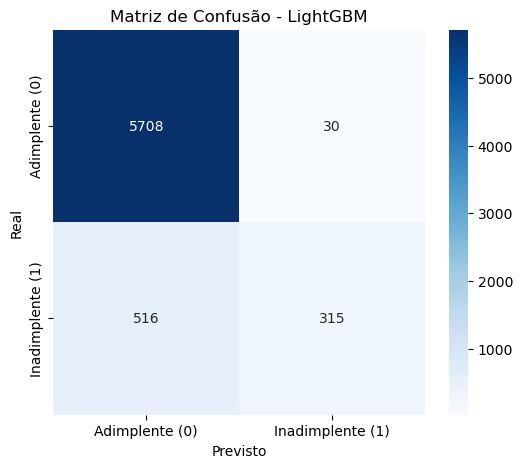

In [ ]:
# Faz a previsão das classes usando o melhor modelo
y_pred = best_model.predict(X_test)

# Obtém as probabilidades da classe positiva (inadimplente)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Define os rótulos das classes
labels = ["Adimplente (0)", "Inadimplente (1)"]

# Cria a figura do gráfico
plt.figure(figsize=(6, 5))

# Plota a matriz de confusão como um heatmap
sns.heatmap(
    cm,
    annot=True,          # Mostra os valores dentro das células
    fmt="d",             # Formato inteiro
    cmap="Blues",        # Paleta de cores azul
    xticklabels=labels, # Rótulos do eixo X
    yticklabels=labels  # Rótulos do eixo Y
)

# Define o título e os rótulos dos eixos
plt.title("Matriz de Confusão - LightGBM")
plt.xlabel("Previsto")
plt.ylabel("Real")

# Exibe o gráfico
plt.show()

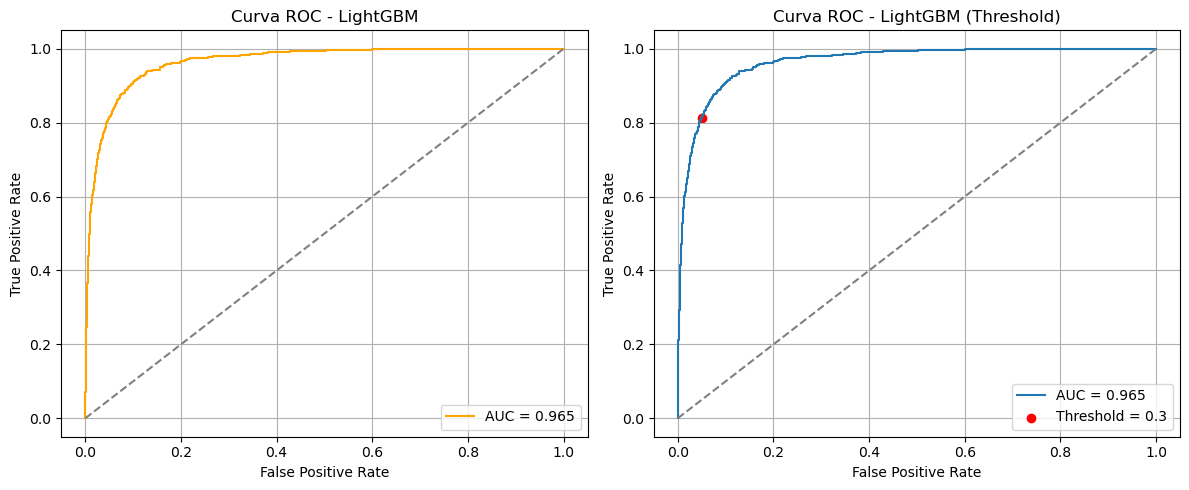

In [51]:
# Melhor modelo
best_lgb = search.best_estimator_

# Probabilidades
y_proba = best_lgb.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Threshold escolhido
threshold = 0.30
idx = np.argmin(np.abs(thresholds - threshold))

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Gráfico 1: ROC padrão
axes[0].plot(fpr, tpr, color="orange", label=f"AUC = {roc_auc:.3f}")
axes[0].plot([0,1],[0,1],"--", color="gray")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("Curva ROC - LightGBM")
axes[0].legend()
axes[0].grid()

# Gráfico 2: ROC com threshold
axes[1].plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
axes[1].scatter(fpr[idx], tpr[idx], color="red", label=f"Threshold = {threshold}")
axes[1].plot([0,1],[0,1],'--', color="gray")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("Curva ROC - LightGBM (Threshold)")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

# Parte 14- Conclusão

**Conclusão Final do Notebook de Machine Learning**

Neste projeto foi desenvolvido um pipeline completo de Machine Learning para previsão de inadimplência, cobrindo desde o pré-processamento dos dados até o deploy do modelo final. Inicialmente, foi realizada uma análise exploratória e tratamento dos dados, garantindo qualidade e consistência para a etapa de modelagem.

**Principais Etapas Executadas**

**1. Pré-processamento dos dados**

- Tratamento de valores ausentes

- Ajuste de tipos de variáveis

- Padronização e organização do dataset para modelagem

**2. Análise e tratamento de outliers (Z-score)**

- Identificação de valores extremos em variáveis como valor_compra e renda

- Redução do impacto de outliers sem perda significativa de informação

- Melhoria da estabilidade dos modelos

**3. Feature Engineering**

- Transformação de variáveis categóricas

- Criação de representações numéricas adequadas para algoritmos de ML

- Enriquecimento do espaço de atributos

**4. Balanceamento de classes com SMOTE**

Distribuição da variável alvo antes do SMOTE:

**Classe 0 (Adimplente): 22.949**

**Classe 1 (Inadimplente): 3.324**

Distribuição após SMOTE:

**Classe 0: 22.949**

**Classe 1: 22.949**

Esse passo foi essencial para reduzir viés do modelo e melhorar a capacidade de detecção da classe minoritária.

**Avaliação dos Modelos de Machine Learning**

Foram testados múltiplos algoritmos supervisionados:

**Naive Bayes**

**Logistic Regression**

**Decision Tree**

**KNN**

**Gradient Boosting**

**Random Forest**

**XGBoost**

**CatBoost**

**LightGBM**

A comparação inicial mostrou que modelos baseados em árvores de decisão e boosting apresentaram melhor desempenho global.Apesar de alguns modelos apresentarem boa acurácia, observou-se que Recall e F1-score da classe inadimplente eram métricas críticas para o negócio.

**Análises Avançadas**

- Feature Importance para interpretação dos modelos

- Matrizes de confusão para análise de erros

- Classification Reports detalhados

- Curvas ROC para comparação de desempenho

O LightGBM destacou-se como o modelo mais promissor entre os algoritmos tradicionais.

**Otimização com Hyperparameter Tuning + K-Fold**

Foi aplicado:

- Randomized Search

- Validação cruzada estratificada (K-Fold)

- Métrica principal: ROC AUC

**Resultado:**

- ROC AUC no teste: 0.9649
 
- Ajuste de Threshold

A análise de diferentes thresholds mostrou que 0.30 oferece o melhor equilíbrio entre Recall e F1-score:

- Accuracy: 0.933

- Recall: 0.812

- F1-score: 0.754

Esse ajuste é fundamental em cenários de crédito, onde reduzir falsos negativos é mais importante do que maximizar acurácia modelo Final (Modelo Turing) métricas finais do modelo:

- Accuracy: 0.933

- Recall: 0.812

- F1-score: 0.754

- ROC AUC: 0.965

O modelo apresentou excelente capacidade de separação entre adimplentes e inadimplentes, com bom equilíbrio entre risco e performance.

**Conclusão Final**

**- O projeto resultou em um modelo robusto, interpretável e pronto para produção, atendendo aos objetivos do negócio.**

**- O modelo foi devidamente validado, otimizado e posteriormente deployado via Streamlit, permitindo simulações em tempo real.**